# BUOY DATA METEOGRAM
#### (C) Kyle J Gillett 2023 | @wxkylegillett
----
This script retrieves data from the NDBC via siphon and plots pressure, winds, waves & temperatures 
on a simple meteogram via matplotlib. This script uses MetPy, Matplotlib, Siphon and SounderPy software.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.units import units
import metpy.calc as mpcalc

from siphon.simplewebservice.ndbc import NDBC

import sounderpy as spy


## ------------------ VERTICAL PROFILE DATA RETRIEVAL TOOL ------------------------ ##
##                           v2.0.4 | August 6th, 2023                              ##
##                             (C) KYLE J GILLETT                                   ##
##  THIS TOOL LOADS RAOB, IGRA, RAP, RUC, ERA5, RAP-ANALYSIS, & BUFKIT PROFILE DATA ##
## -------------------- THANK YOU FOR USING THIS PACKAGE -------------------------- ##



In [3]:
# DECLARE WHAT BUOY YOU WANT TO ACCESS
# THIS MUST BE AN ID SUCH AS '42056' AS 
# A STRING
# find buoys here: https://www.ndbc.noaa.gov/
buoy = '42056'

# CREATE DATAFRAME OF DATA WITH SIPHON 
df = NDBC.realtime_observations(buoy)

# DECLARE VARIABLES WE WANT TO PLOT FROM THE DATAFRAME
time = np.array(df['time'][0:144].values)
p  = np.array(df['pressure'][0:144].values)        * units.hPa
wd = np.array(df['wind_direction'][0:144].values) * units.degrees
ws = np.array(df['wind_speed'][0:144].values)     * units('m/s')
wg = np.array(df['wind_gust'][0:144].values)      * units('m/s') 
wh = np.array(df['wave_height'][0:144].values)    * units.m
aT = np.array(df['air_temperature'][0:144].values)* units.degC
wT = np.array(df['water_temperature'][0:144].values)* units.degC
# CALCULATE u & v FOR WIND BARBS
u, v = mpcalc.wind_components(ws, wd)

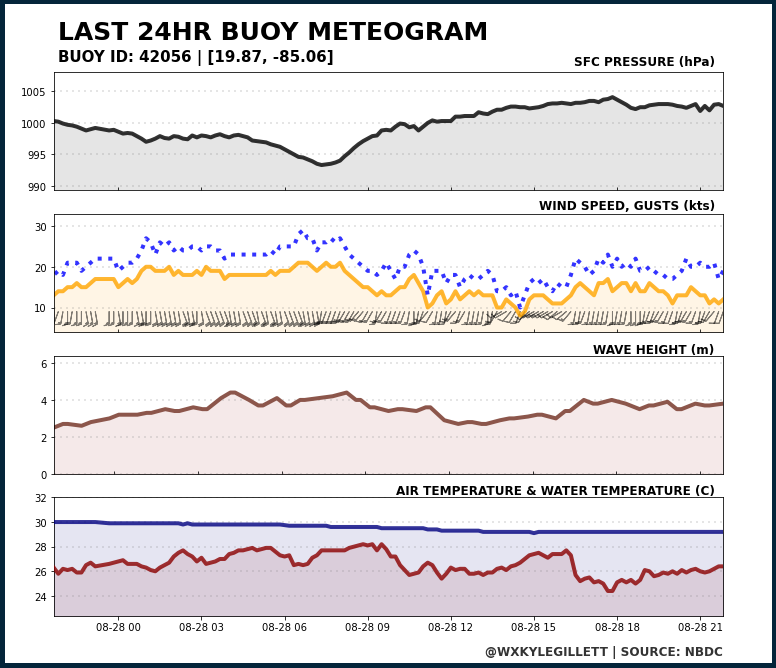

In [4]:
# CREATE FIGURE
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), linewidth=10, edgecolor="#04253a")
fig.set_facecolor('#ffffff')


# PLOT PRESSURE DATA 
ax1.set_ylim(p.min().m-4, p.max().m+4)
ax1.plot(time, p, color='black', alpha=0.8, linewidth=4)
ax1.fill_between(time, p, color='black', alpha=0.1)
ax1.grid(which='major', axis='y', linestyle=(0, (5, 10)), color='gray', linewidth=0.4)
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.tick_params(axis="x",direction="in", pad=-12)
ax1.set_ylabel(' ')
ax1.margins(0)
plt.figtext(0.89, 0.89, 'SFC PRESSURE (hPa)', ha='right', weight='bold', fontsize=12)

# PLOT WIND DATA
ax2.set_ylim(ws.min().m-4, wg.max().m+4)
ax2.plot(time, ws, color='orange', alpha=0.8, linewidth=4)
ax2.fill_between(time, ws, color='orange', alpha=0.1)
ax2.plot(time, wg, color='blue', linestyle='dotted', alpha=0.8, linewidth=4)
ax2.barbs(time, ws.min().m+1, u, v, length=5, alpha=0.5)
ax2.grid(which='major', axis='y', linestyle=(0, (5, 10)), color='gray', linewidth=0.4)
ax2.tick_params(axis="x",direction="in", pad=-12)
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.set_ylabel(' ')
ax2.margins(0)
plt.figtext(0.89, 0.69, 'WIND SPEED, GUSTS (kts)', ha='right', weight='bold', fontsize=12)

# PLOT WAVE DATA  
s1mask = np.isfinite(wh)
ax3.set_ylim(0, wh[s1mask].max().m+2)
ax3.plot(time[s1mask], wh[s1mask], color='tab:brown', linestyle='-', linewidth='4')
ax3.fill_between(time[s1mask], wh[s1mask], color='brown', alpha=0.1)
ax3.grid(which='major', axis='y', linestyle=(0, (5, 10)), color='gray', linewidth=0.4)
ax3.xaxis.set_tick_params(labelbottom=False)
ax3.tick_params(axis="x",direction="in", pad=-12)
ax3.set_ylabel(' ')
ax3.margins(0)
plt.figtext(0.89, 0.49, 'WAVE HEIGHT (m)', ha='right', weight='bold', fontsize=12)

# PLOT TEMPERATURES 
s2mask = np.isfinite(wT)
s3mask = np.isfinite(aT)
ax4.set_ylim(aT[s3mask].m.min()-2, wT[s2mask].m.max()+2)
ax4.plot(time[s3mask], aT[s3mask], color='darkred', alpha=0.8, linestyle='-', linewidth='4', zorder=4)
ax4.fill_between(time[s3mask], aT[s3mask], color='darkred', alpha=0.1)
ax4.plot(time[s2mask], wT[s2mask], color='navy', alpha=0.8, linestyle='-', linewidth='4', zorder=4)
ax4.fill_between(time[s2mask], wT[s2mask], color='navy', alpha=0.1)
ax4.grid(which='major', axis='y', linestyle=(0, (5, 10)), color='gray', linewidth=0.4)
ax4.set_ylabel(' ')
ax4.margins(0)
plt.figtext(0.89, 0.294, 'AIR TEMPERATURE & WATER TEMPERATURE (C)', ha='right', weight='bold', fontsize=12)

# ADD TITLES 
plt.figtext(0.95, 0.96, ' ')
plt.figtext(0.13, 0.925, 'LAST 24HR BUOY METEOGRAM', ha='left', weight='bold', fontsize=25)
plt.figtext(0.13, 0.895, f'BUOY ID: {buoy} | {spy.buoy_latlon(buoy)}', ha='left', weight='bold', fontsize=15)

# ADD SOURCE 
plt.figtext(0.90, 0.07, f'@WXKYLEGILLETT | SOURCE: NBDC', weight='bold', color='black', fontsize=12, ha='right', alpha=0.8)
plt.figtext(0.90, 0.065, f' ')
plt.show()
